In [1]:
mport torch
import math
import torch.nn as nn
import pandas as pd
import torch.nn.functional as F
from torch.optim import Adam

import lightning as L
from torch.utils.data import TensorDataset, DataLoaderi

In [2]:
from CurrencyDataModule import CurrencyDataModule
dm = CurrencyDataModule('../cleaned/usdrub_new.csv', seq_length=5, columns=['close'], batch_size=16)

In [4]:
class LSTM(nn.Module):
  def __init__(self):
    super().__init__()

    self.lstm = nn.LSTM(input_size=1, hidden_size=1, batch_first=True)
    self.linear = nn.Linear(in_features=1, out_features=1)

  def forward(self, input):
    lstm_output = self.lstm(input)
    
    # [batch_size, 1]
    last_unrolled_values = lstm_output[0][:, -1, :]
    prediction = self.linear(last_unrolled_values)
    return prediction

In [12]:
class LitLSTM(L.LightningModule):
  def __init__(self, lstm, learning_rate):
    super().__init__()
    self.lstm = lstm
    self.learning_rate = learning_rate

  def configure_optimizers(self):
    return Adam(self.parameters(), lr= self.learning_rate)
  
  def training_step(self, batch, batch_idx):
    input = batch[0]
    label = batch[1]
    # [batch_size, 1]
    output = self.lstm(input)
    loss = (output - label).pow(2).sum()

    self.log("train_loss", loss)
    return loss
  
  def test_step(self, batch, batch_idx):
    input = batch[0]
    label = batch[1]
    # [batch_size, 1]
    output = self.lstm(input)
    loss = (output - label).pow(2).sum()

    self.log("test_loss", loss)
    return loss
  
  def predict_step(self, batch, batch_idx):
    input = batch[0]
    return self.lstm(input)

In [13]:
model = LitLSTM(LSTM(), learning_rate=0.01)

In [14]:
trainer = L.Trainer(max_epochs = 100, log_every_n_steps=2)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [15]:
trainer.fit(model, datamodule=dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 18    
------------------------------
18        Trainable params
0         Non-trainable params
18        Total params
0.000     Total estimated model params size (MB)
c:\Users\igor\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Epoch 0:   0%|          | 0/137 [00:00<?, ?it/s] 

Epoch 99: 100%|██████████| 137/137 [00:00<00:00, 201.14it/s, v_num=17]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 137/137 [00:00<00:00, 199.67it/s, v_num=17]


In [16]:
trainer.test(model, datamodule=dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\igor\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 59/59 [00:00<00:00, 460.91it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     4957.47900390625      │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 4957.47900390625}]

In [17]:
predictions = trainer.predict(model, datamodule=dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\igor\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 59/59 [00:00<00:00, 411.75it/s]


In [24]:
len(predictions.view())

16

In [25]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [26]:
fl = flatten(predictions)

In [27]:
fl

[tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),
 tensor([63.9915]),


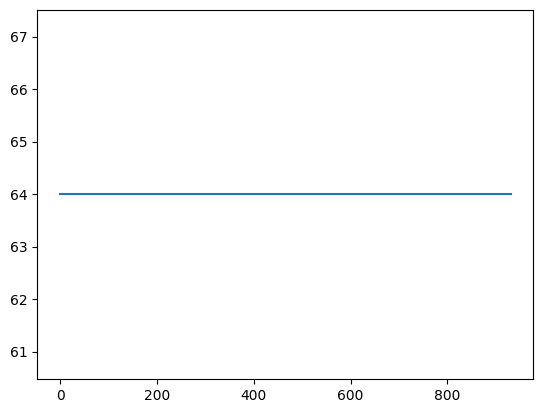

In [28]:
import matplotlib.pyplot as plt
plt.plot(fl)